# Example - Sensitivity Study of Reinforcement

The following example shows some of the features of the new RCS API.

Taking an existing file with a section that has pre-defined **cross-section dimensions and loading**, we can add/modify the reinforcement to study effects on the section.

# Sensitivity study method

We can take the base model **Project2.IdeaRcs** and open it using the API, we can then make modifications to it. 

After we open the project we will automate the following steps:
1. Apply a reinforcement template to the selected design section.
2. Run the calculation.
3. Extract the results we want to check from the calculation.
4. Add the results to a dataframe which we can use to plot on a graph.

We will do the following steps for each of the templates shown below:

<img src="templates_image.png" alt="templates" style="border: 2px solid black">

## Ensure required packages are installed

IMPORTANT : To be able to run this Jupyter notebook make sure IdeaStatiCa.RcsRestApi.exe is running and listening on http://localhost:5000/index.html and make sure all requirements are installed (see [requirements.txt](requirements.txt))

In [1]:
#install all required packages 
#!pip install ideastatica-rcs-api==25.1.0.3183
#!pip install xmltodict
#!pip install pandas
#!pip install matplotlib
#!pip install numpy

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Open existing project and get section details

In [2]:
import project_calculator_v2

# file name of a rsc project to be calculate
project_to_calculate = r"Project2.IdeaRcs"

# det details from the rcs project
df_sections = project_calculator_v2.get_section_details(project_to_calculate)

df_sections

Project2.IdeaRcs


,Id,Name,RfCssId,Member
0,1,S 1,1,1
1,3,S 2,1,1


# Run loop of template application, calculation and results

In [3]:
# section to calulate
section_in_rcs_project = 1
reinforced_css_templates = ["rect-L-2-2.nav","rect-L-3-2.nav","rect-L-4-2.nav"]
# calculate all variants 
df_sectionChecks =project_calculator_v2.calc_rcs_proj_variants(project_to_calculate, section_in_rcs_project, reinforced_css_templates)

df_sectionChecks

,SecId,SecName,Template,RfId,Capacity,Shear,Interaction,CrackWidth,Response,StressLimitation
0,1,S 1,rect-L-2-2.nav,3,10.0,10.0,10.0,0.0,10.0,10.0
1,1,S 1,rect-L-3-2.nav,4,10.0,10.0,10.0,0.0,10.0,10.0
2,1,S 1,rect-L-4-2.nav,5,10.0,10.0,10.0,0.0,10.0,10.0


# Plot the output of the Optimisation (matplotlib)

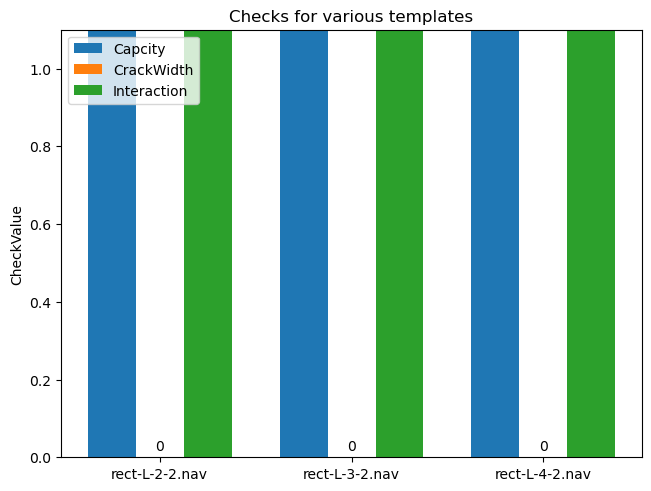

In [4]:
x = np.arange(len(reinforced_css_templates))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

checks = {
    "Capcity": df_sectionChecks['Capacity'],
    "CrackWidth": df_sectionChecks['CrackWidth'],
    "Interaction": df_sectionChecks['Interaction'],    
}

#fig, ax = plt.subplots()
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in checks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title('Checks for various templates')
ax.set_ylabel('CheckValue')
ax.set_xticks(x + width, df_sectionChecks['Template'])
ax.legend(loc='upper left')
ax.set_ylim(0, 1.1)
plt.show()
